# 回帰分析（ベイズ統計＋MCMC)
---
## 1. 回帰モデル
---
$$
    \boldsymbol{y} = \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}　\\
    ここで、
        \boldsymbol{y} = \left( \begin{array}{c}
                       y_1 \\
                       \vdots \\
                       y_n
                     \end{array} \right), \ \ 
    \boldsymbol{X} = \left( \begin{array}{ccc}
                       x_{1,1} & \ldots & x_{1,K} \\
                       \vdots & \ddots & \vdots \\
                       x_{n,1} & \ldots & x_{n,K}
                     \end{array} \right), \ \ 
    \boldsymbol{\beta} = \left( \begin{array}{c}
                       \beta_1 \\
                       \vdots \\
                       \beta_n
                     \end{array} \right), \ \ 
    \boldsymbol{\epsilon} = \left( \begin{array}{c}
                       \epsilon_1 \\
                       \vdots \\
                       \epsilon_n
                     \end{array} \right) \ \  
$$
* $\boldsymbol{y}$は被説明変数。サンプル数は$n$。
* $\boldsymbol{X}$は説明変数。変数の数は$K$（定数項含む）。サンプル数は$n$。
* $\boldsymbol{\beta}$は回帰係数。変数の数が$K$であることに対応。
* $\boldsymbol{\epsilon}$は誤差項。サンプル数が$n$であることに対応。

## 2. 尤度関数
---
### 2.1. 誤差項の仮定
---
$$
\begin{eqnarray}
  \boldsymbol{\epsilon}|\sigma^2 &\sim& \mathcal {N}(\boldsymbol{0},\sigma^2 \boldsymbol{I_n}) \\
  \Rightarrow   \boldsymbol{y}|\boldsymbol{\beta},\sigma^2 &\sim& \mathcal {N}(\boldsymbol{X \beta},\sigma^2 \boldsymbol{I_n}) \\
\end{eqnarray}
$$
* 誤差項$\boldsymbol{\epsilon}$は、平均$0$、分散$\sigma^2\boldsymbol{I_n}$の多変量正規分布に従う（各誤差項$\epsilon_i$は、平均$0$、分散$\sigma^2$の正規分布に従い、誤差項同士は独立である）。

### 2.2. 尤度関数
---
$$
\begin{eqnarray}
  f \left( \boldsymbol{y} | \boldsymbol{\beta}, \sigma^2 \right) &=& \left(2\pi\right)^{-n/2} \left|\sigma^2 I_n\right|^{-1/2}
                                     \exp \left\{ -\frac{1}{2} \left( \boldsymbol{y}-\boldsymbol{X\beta} \right)^\prime \left( \sigma^2 \boldsymbol{I_n} \right) ^{-1} \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\beta} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
\end{eqnarray}
$$

## 3. 事前分布
---
### 3.1. 各パラメータの事前分布
---
$$
\begin{eqnarray}
  \beta &\sim& \mathcal{N} \left(\boldsymbol{b_0},\boldsymbol{B_0} \right),\\
  \sigma^2 &\sim& \mathcal{IG} \left(\frac{n_0}{2},\frac{n_0 S_0}{2} \right)
\end{eqnarray}
$$
### 3.2. 同時事前分布
---
$$
\begin{eqnarray}
 \pi \left( \beta,\sigma^2 \right) &=& \pi \left( \beta \right) \pi \left(\sigma^2 \right) \\
                                 &=& \left(2\pi\right)^{-K/2} \left| B_0 \right|^{-1/2}
                                     \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
                                 & & \times \frac{\left(\frac{n_0S_0}{2}\right)^{\frac{n_0}{2}}}{\Gamma \left( \frac{n_0}{2} \right)} \sigma^{-2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
                                 & \propto & 
                                     \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
                                     & & \times \sigma^{ -2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
\end{eqnarray}
$$

## 4. 事後分布
---
### 4.1. 同時事後分布
---
$$
\begin{eqnarray}
  \pi \left( \beta,\sigma^2 \mid y \right) &\propto& f\left(y \mid \beta,\sigma^2 \right) \pi \left(\beta,\sigma^2\right) \\
  &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\beta} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     & & \times \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
                                     & & \times \sigma^{ -2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
\end{eqnarray}
$$
### 4.2. 条件付き事後分布
---
#### 4.2.1. 分散$\sigma^2$
---
$$
\begin{eqnarray}
  \pi \left( \sigma^2 \mid y,\bar{\beta} \right) &=& \frac{\pi \left( \bar{\beta},\sigma^2 \mid y \right)}{\pi \left( \bar{\beta} \mid y  \right)} \\
  &\propto& \pi \left( \bar{\beta},\sigma^2 \mid y \right) \\
  &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\bar{\beta}} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\bar{\beta}} \right) \right\} \\
                                     & & \times \exp \left\{ -\frac{1}{2} \left( \bar{\beta}-b_0 \right)^\prime \left( B_0 \right)^{-1} \left( \bar{\beta}-b_0 \right) \right\} \\
                                     & & \times \sigma^{ -2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
  &\propto& \sigma^{-n} \exp \left\{ -\frac{\sigma^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\bar{\beta}} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\bar{\beta}} \right) \right\} \\
                                     & & \times \sigma^{ -2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \sigma^{-2} \right\} \\
  &\propto& \sigma^{ -2 \left( \frac{n_0+n}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0 + \left( \boldsymbol{y}- \boldsymbol{X\bar{\beta}} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\bar{\beta}} \right)}{2} \sigma^{-2} \right\} \\
\sigma^2 \mid y, \bar{\beta} &\sim& \mathcal{IG} \left(\frac{n_0+n}{2},\frac{n_0 S_0+ \left( \boldsymbol{y}- \boldsymbol{X\bar{\beta}} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\bar{\beta}} \right)}{2} \right)
\end{eqnarray}
$$

#### 4.2.2. 回帰係数$\beta$
---
$$
\begin{eqnarray}
  \pi \left( \beta \mid y,\bar{\sigma}^2 \right) &=& \frac{\pi \left( \beta,\bar{\sigma}^2 \mid y \right)}{\pi \left( \bar{\sigma}^2 \mid y  \right)} \\
  &\propto& \pi \left( \beta,\bar{\sigma}^2 \mid y \right) \\
  &\propto& \bar{\sigma}^{-n} \exp \left\{ -\frac{\bar{\sigma}^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\beta} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     & & \times \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
                                     & & \times \bar{\sigma}^{ -2 \left( \frac{n_0}{2}+1 \right) } \exp \left\{ - \frac{n_0S_0}{2} \bar{\sigma}^{-2} \right\} \\
  &\propto& \exp \left\{ -\frac{\bar{\sigma}^{-2}}{2} \left( \boldsymbol{y}- \boldsymbol{X\beta} \right)^\prime  \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     & & \times \exp \left\{ -\frac{1}{2} \left( \beta-b_0 \right)^\prime \left( B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
  &\propto& \exp \left\{ -\frac{\bar{\sigma}^{-2}}{2} \left( \boldsymbol{y}^\prime- \boldsymbol{\beta^\prime X^\prime} \right)  \left( \boldsymbol{y}-\boldsymbol{X\beta} \right) \right\} \\
                                     & & \times \exp \left\{ -\frac{1}{2} \left( \beta^\prime-b_0^\prime \right) \left( B_0 \right)^{-1} \left( \beta-b_0 \right) \right\} \\
  &\propto& \exp \left\{ -\frac{\bar{\sigma}^{-2}}{2} \left( \boldsymbol{y^\prime y} - \boldsymbol{y^\prime X\beta} - \boldsymbol{\beta^\prime X^\prime y} + \boldsymbol{\beta^\prime X^\prime X\beta} \right)   \right\} \\
                                     & & \times \exp \left\{ -\frac{1}{2} \left( \beta^\prime B_0^{-1} \beta - \beta^\prime B_0^{-1} b_0 - b_0^\prime B_0^{-1} \beta + b_0^\prime B_0^{-1} b_0 \right) \right\} \\
  &\propto& \exp \left\{ -\frac{1}{2} \left( \bar{\sigma}^{-2}\boldsymbol{y^\prime y} - \bar{\sigma}^{-2}\boldsymbol{y^\prime X\beta} - \bar{\sigma}^{-2}\boldsymbol{\beta^\prime X^\prime y} + \bar{\sigma}^{-2}\boldsymbol{\beta^\prime X^\prime X\beta} \\
                                     + \beta^\prime B_0^{-1} \beta - \beta^\prime B_0^{-1} b_0 - b_0^\prime B_0^{-1} \beta + b_0^\prime B_0^{-1} b_0 \right) \right\} \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \beta^\prime \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} \beta 
  - \beta^\prime \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right)\beta
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \beta^\prime \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} \beta \\
  - \beta^\prime \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \beta \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \beta^\prime \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} 
  \left( \beta - \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right)} \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \beta \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \beta^\prime \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right) 
  \left( \beta - \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right)} \right) \\
  - \underline{\left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right)} \beta \\
  + \underline{\left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right)} \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right)} \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right)} \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \beta^\prime \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} 
  \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right) \\
  - \underline{\left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right)} \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \beta^\prime \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} 
  \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)} \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \left(\beta^\prime - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \right) \\
  \times \underline{\left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right) 
  \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right)} \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \left(\beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right)^\prime \\
  \times \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right) 
  \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right) \\
  - \left(\bar{\sigma}^{-2}y^\prime X + b_0^\prime B_0^{-1} \right) \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \\
  + \left(\bar{\sigma}^{-2}y^\prime y + b_0^\prime B_0^{-1} b_0 \right) \right\} \right] \\
  &\propto& \exp \left[ -\frac{1}{2} \left\{ 
  \left(\beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right)^\prime \\
  \times \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right) 
  \left( \beta - \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right) \right) \right\} \right] \\
\beta \mid y,\bar{\sigma}^2 &\sim& \mathcal{N} \left( \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \left( \bar{\sigma}^{-2} X^\prime y + B_0^{-1} b_0 \right)^\prime, \left( \bar{\sigma}^{-2} X^\prime X + B_0^{-1} \right)^{-1} \right)
\end{eqnarray}
$$

## 5. データ分析
---
### 5.1. ディレクトリ変更
---
* *UserDirectory*は、各自のディレクトリに変更が必要
 フォルダの階層は、`"\"`ではなく、`"/"`なので注意

In [1]:
cd "UserDirectory"
pkg load statistics

### 5.2. データ読み込み
---
* ダイアモンドに関するデータ
    * [フロリダ州立大学](https://people.sc.fsu.edu/~jburkardt/datasets/triola/triola.html)よりダウンロード（[データへの直リンク](https://people.sc.fsu.edu/~jburkardt/datasets/triola/diamonds.csv)）
* データセットの構成

|列1|列2|列3|列4|列5|列6
|-
|PRICE|CARAT|DEPTH|TABLE|COLOR|CLARITY

In [2]:
clear all;
data = csvread("diamonds.csv")(2:end,:);

### 5.3. 被説明変数、説明変数の設定
---

In [3]:
n = rows(data);

y = data(:,1);
X = [ones(n,1),data(:,2)];

### 5.4. 事前分布の設定
---
#### 5.4.1. 回帰係数（$\beta$）
---

In [4]:
K = columns(X);
b0 = zeros(K,1);
B0 = 10000^2*eye(K);

> `B0`の設定値が小さすぎると、うまくいかないので注意

#### 5.4.2. 分散（$\sigma^2$）
---

In [5]:
n0 = 0.002;
n0S0 = 0.002;

### 5.5. MCMCによる事後分布のサンプリング
---
#### 5.5.1. 事前設定
---

In [6]:
%% (0)各種設定
    burnin = 1000;
    n_sim = 50000;
    beta = zeros(n_sim,K);
    sigma2 = zeros(n_sim,1);

#### 5.5.2. MCMCの初期値
---

In [7]:
%% (1)初期値を決める
   beta(1,:) = zeros(1,K);
   sigma2(1) = 0.02^2;

#### 5.5.3. ギブスサンプリング
---

In [8]:
%% (2)シミュレーション
    for i=2:n_sim
        %%(a)betaを発生する
            B1 = inv(sigma2(i-1)^(-1)*X'*X+inv(B0));
            b1 = B1*(sigma2(i-1)^(-1)*X'*y + inv(B0)*b0);
            beta(i,:) = mvnrnd(b1',B1);
            
        %%(b)σ2を発生する
            n1 = n0 + n;
            n1S1 = n0S0 + (y-X*beta(i,:)')'*(y-X*beta(i,:)');
            gamma = gamrnd(n1/2,(n1S1/2)^(-1));
            sigma2(i) = 1/gamma;
    endfor

### 5.6. 結果のグラフ化
---
#### 5.6.1. 回帰結果
---

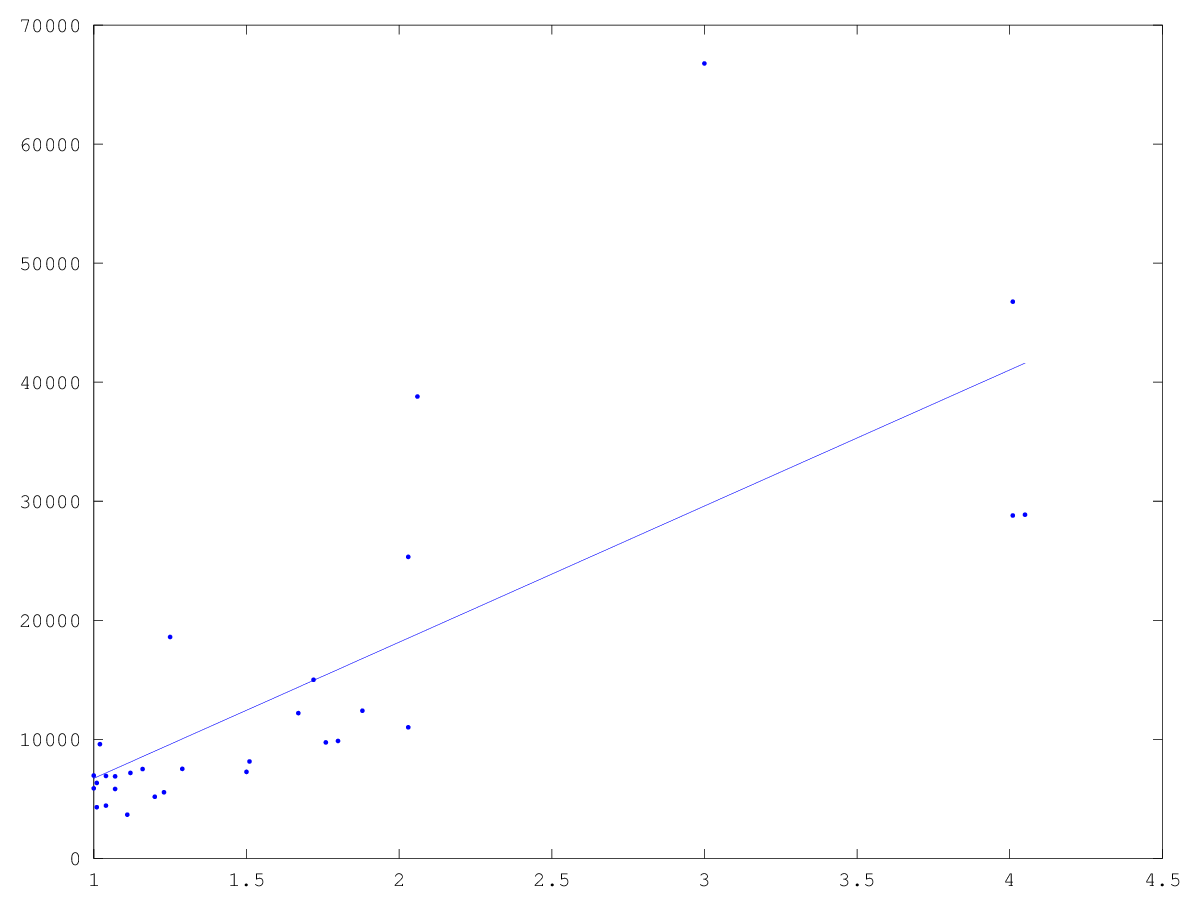

In [9]:
beta_mean=[mean(beta(burnin+1:end,1));mean(beta(burnin+1:end,2))];
yy = X*beta_mean;

plot(X(:,2),yy)
hold on
plot(X(:,2),y,".")

#### 5.6.2. 回帰係数の事後分布①（$\beta_1$）
---
##### 5.6.2.1. 収束判定

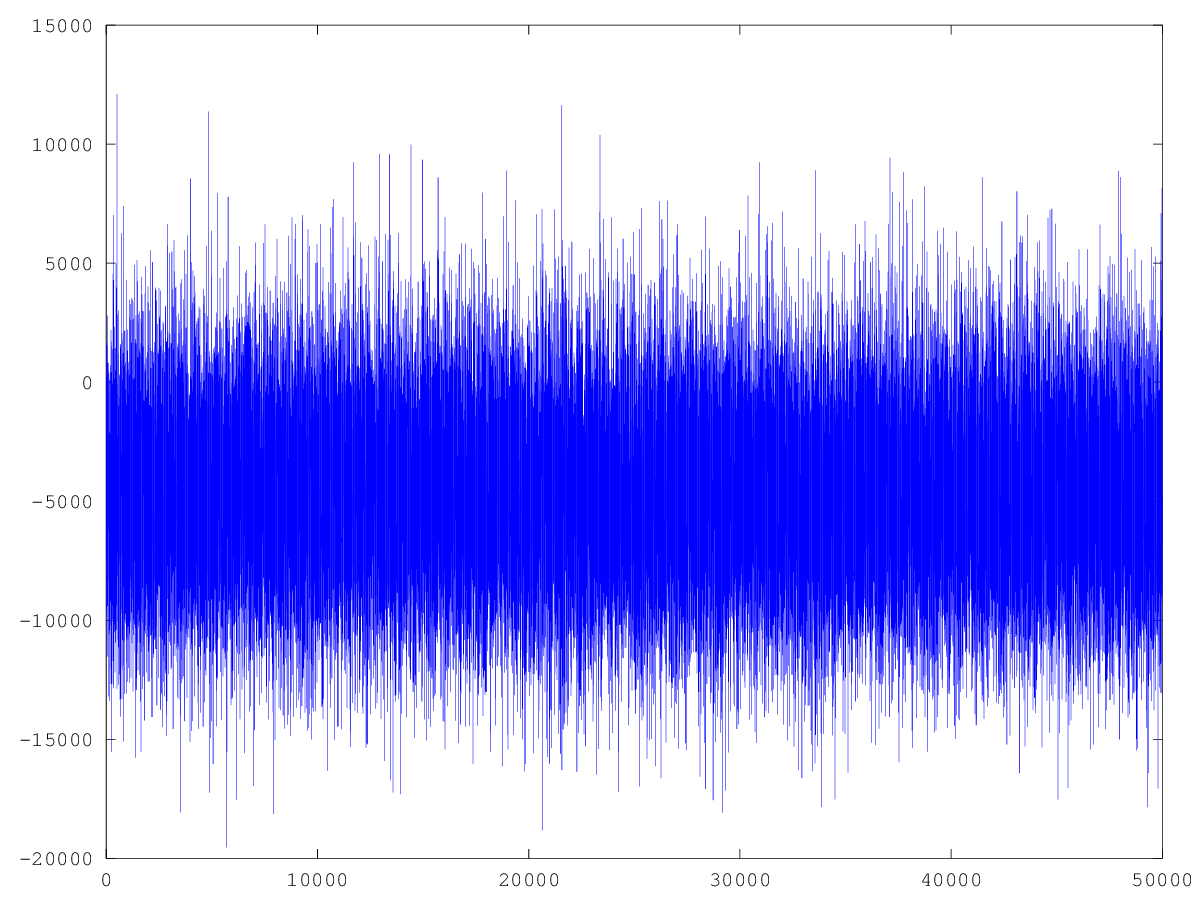

In [10]:
plot(beta(:,1))

##### 5.6.2.2. 事後分布

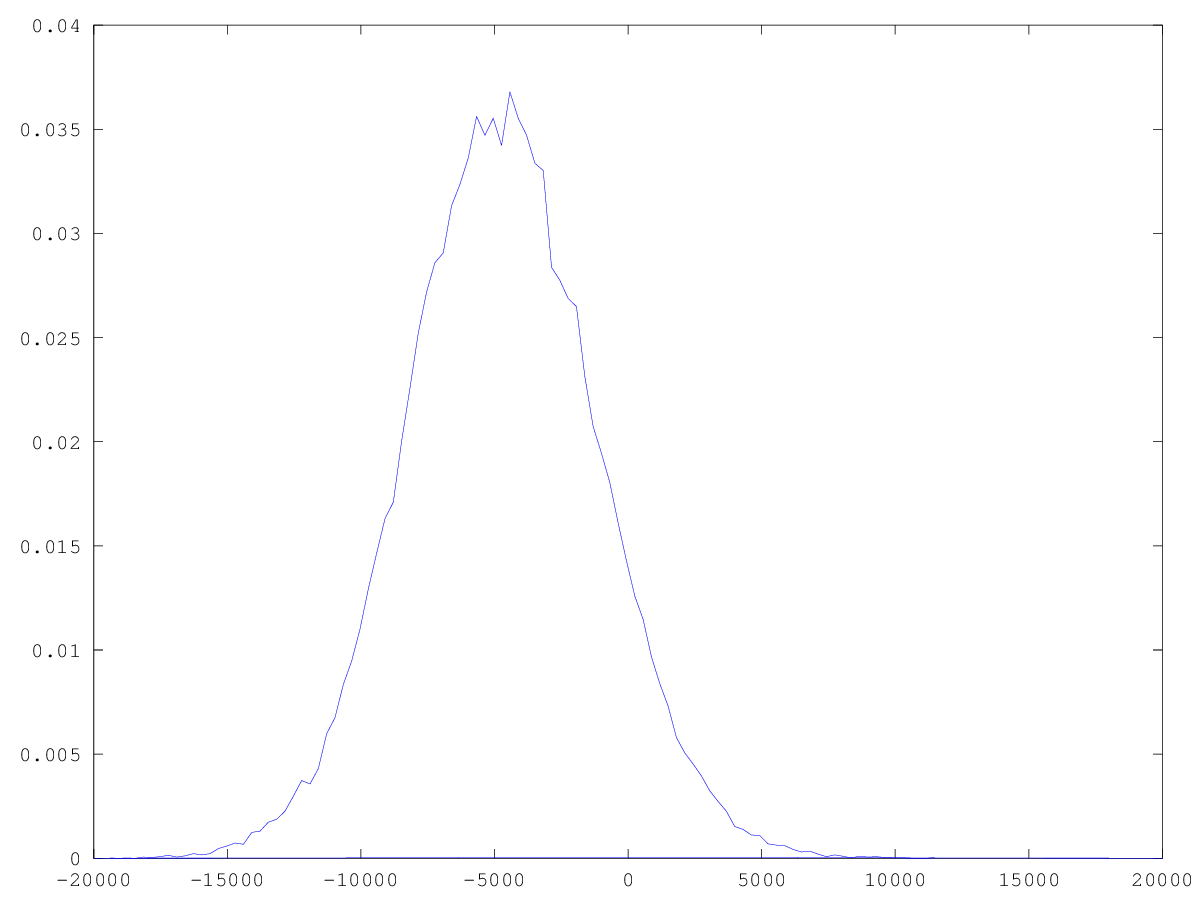

In [11]:
x1 = linspace(-2*B0(1,1)^(1/2),2*B0(1,1)^(1/2),100);
y1 = normpdf(x1,0,B0(1,1)^(1/2));

[nn,xx] = hist(beta(burnin+1:end,1),100);
nn = nn/(n_sim-burnin);

plot(xx,nn)
hold on
plot(x1,y1)

#### 5.6.3. 回帰係数の事後分布②（$\beta_2$）
---
##### 5.6.3.1. 収束判定

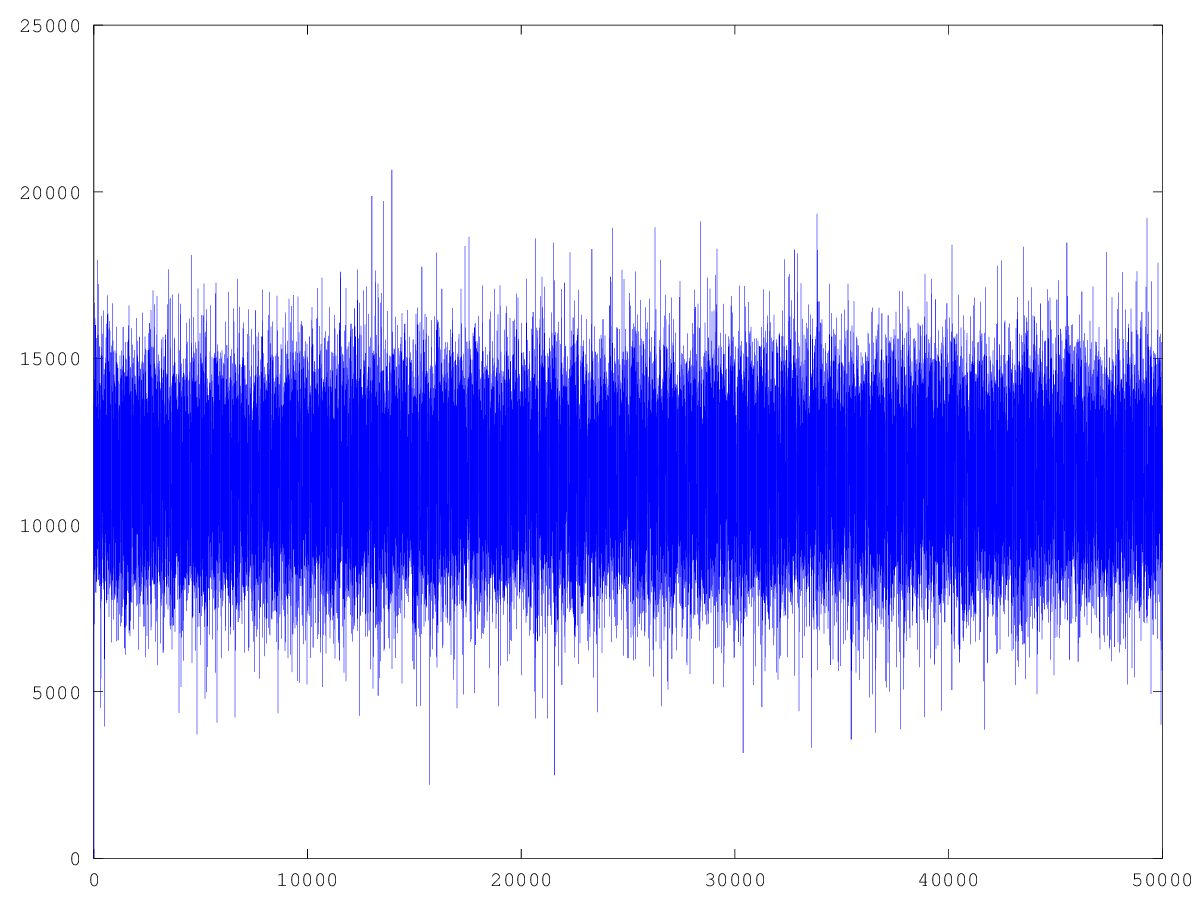

In [12]:
plot(beta(:,2))

##### 5.6.3.2. 事後分布

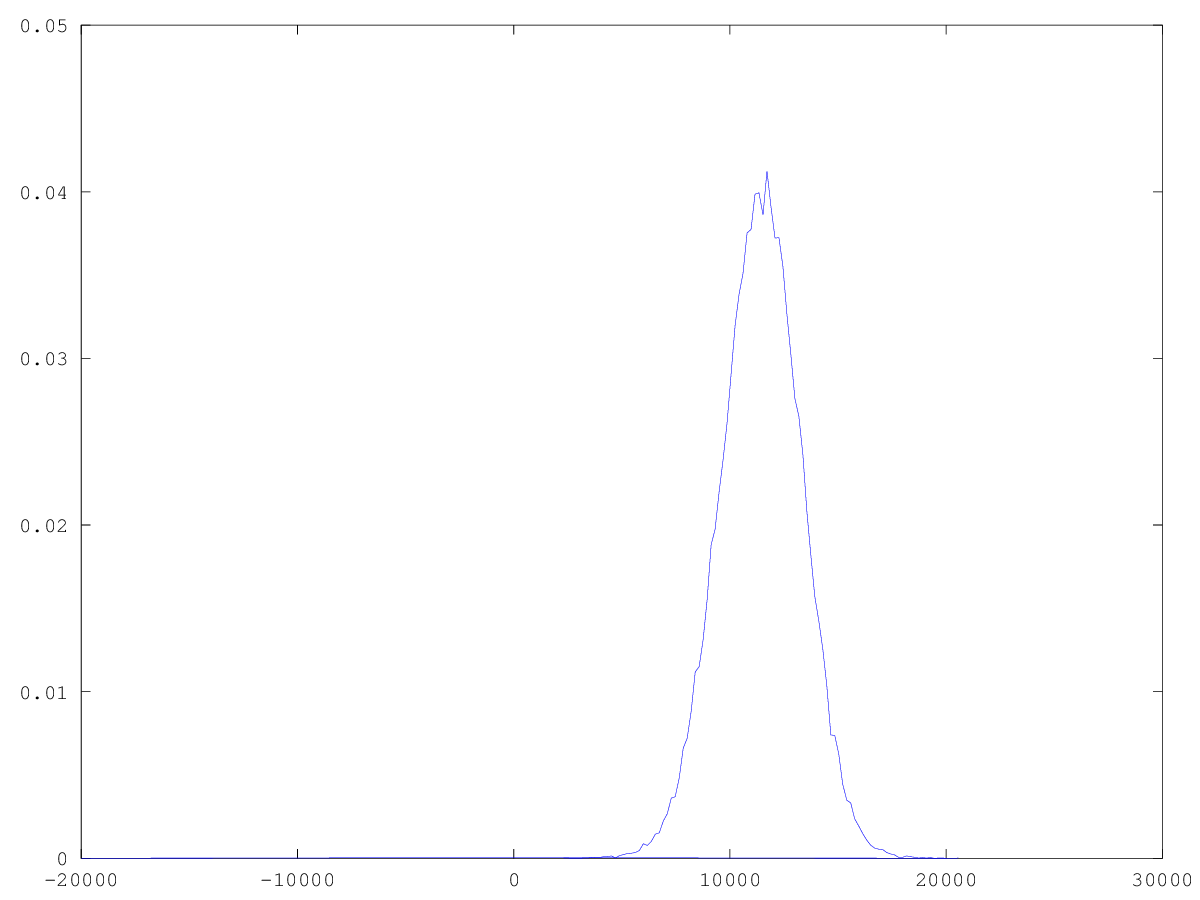

In [13]:
x1 = linspace(-2*B0(1,1)^(1/2),2*B0(1,1)^(1/2),100);
y1 = normpdf(x1,0,B0(1,1)^(1/2));

[nn,xx] = hist(beta(burnin+1:end,2),100);
nn = nn/(n_sim-burnin);

plot(xx,nn)
hold on
plot(x1,y1)

#### 5.6.4. 誤差項の分散の事後分布（$\sigma^2$）
---
##### 5.6.4.1. 収束判定

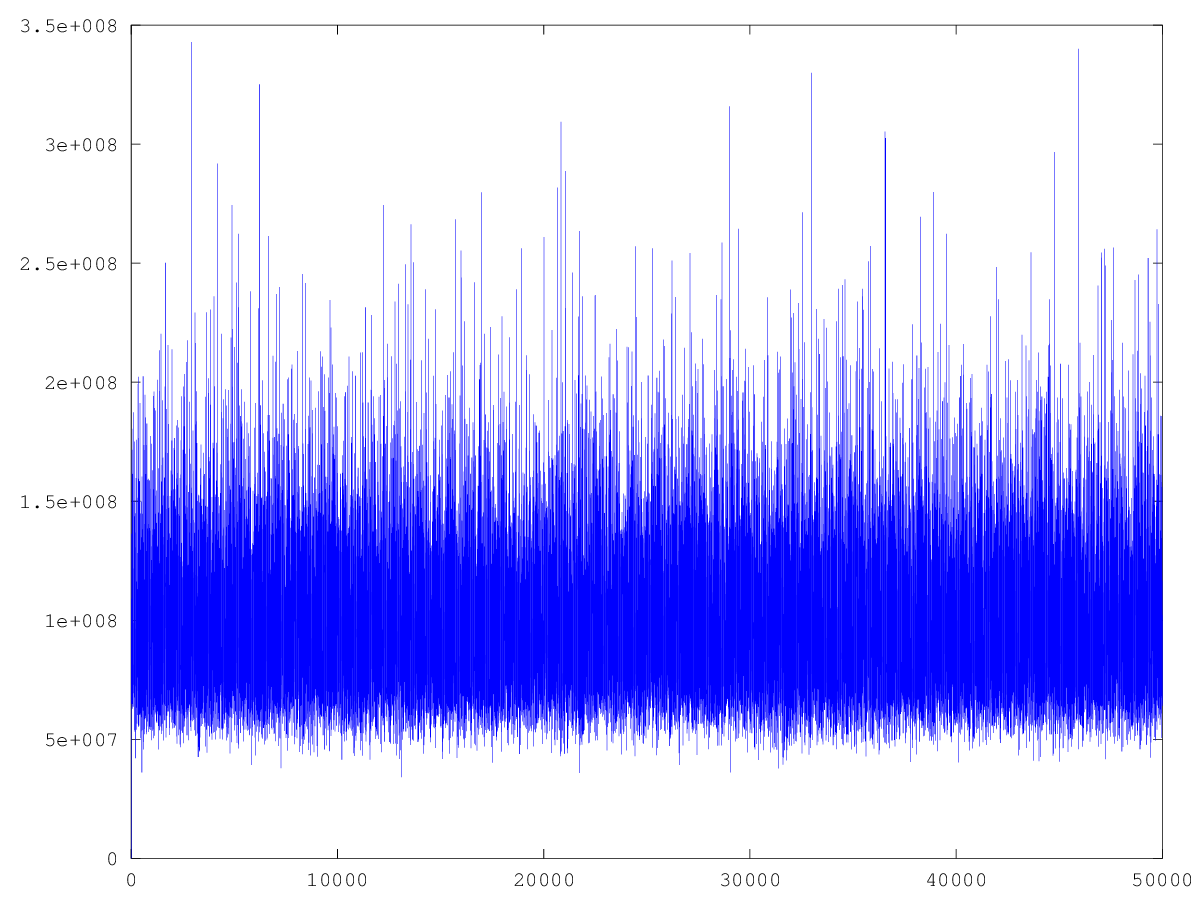

In [14]:
plot(sigma2)

##### 5.6.4.2. 事後分布

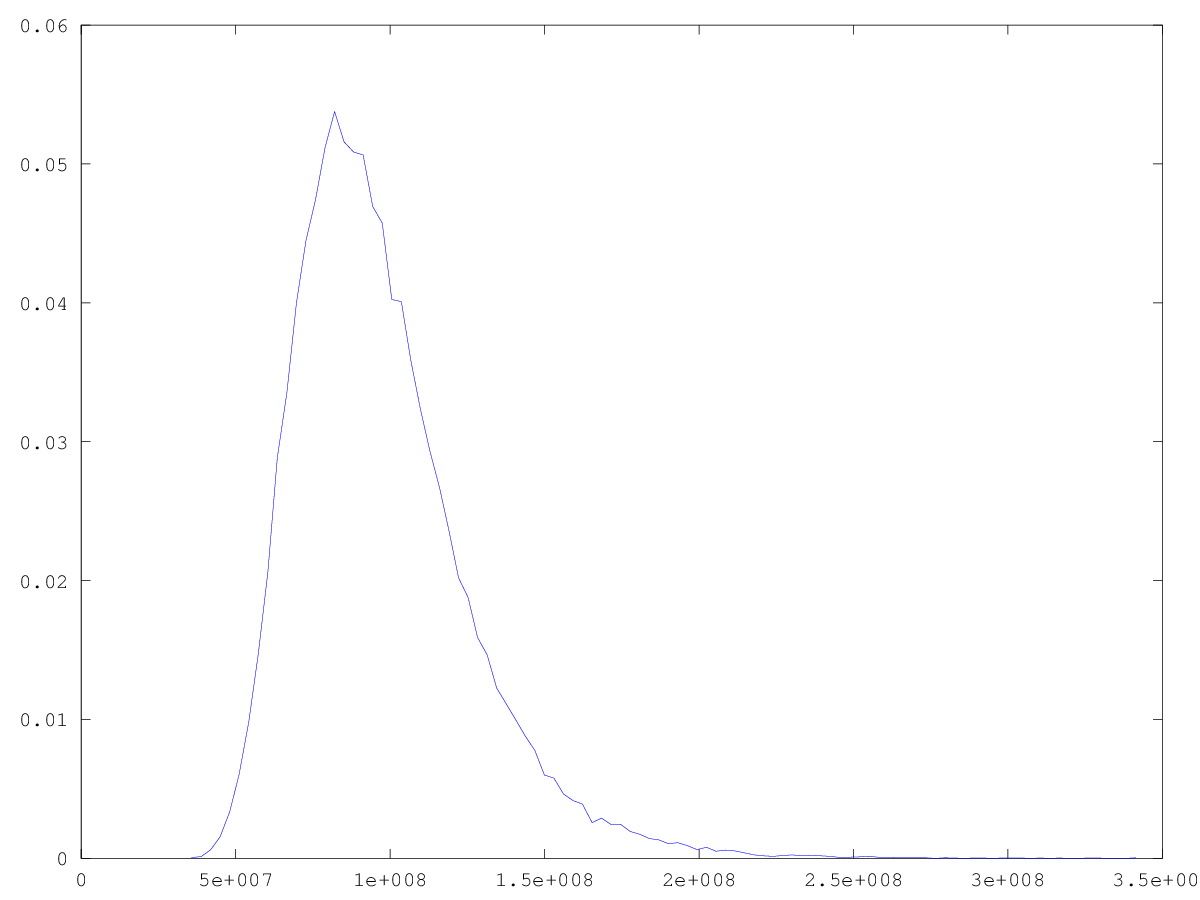

In [15]:
[nn,xx] = hist(sigma2(burnin+1:end),100);
nn = nn/(n_sim-burnin);

plot(xx,nn)